In [1]:
import math

import pandas as pd

df_nodes = pd.read_csv("../Java/resources/nodes_real.csv", sep="\t")
df_nodes.drop(columns=["label", "Id", "timeset", "betweenesscentrality"], inplace=True)
df_nodes.rename(columns={"id" : "Spotify ID"}, inplace=True)
df_nodes

,eigencentrality,0,eccentricity,harmonicclosnesscentrality,Spotify ID,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree
0,0.000000,Collage feat. Anthony Monteleone,0.0,0.000000,5QcyHgSqQwlyYrtQYEPw4t,0,0,0.0,0,0.000000,0.0
1,0.007219,Jpalm,13.0,0.174304,5Ss1B4541iyrfqV8t4hNMJ,19,0,0.0,6865,0.167204,130.0
2,0.001367,Matty Heilbronn,14.0,0.163995,08t9cpoVVv9btZOBqZgW3Z,1,0,0.0,7416,0.158731,2.0
3,0.001000,Heiko Laux,2.0,0.583333,2pmVj0JrzZpPFXhQRrhz1E,2,0,0.0,6708,0.545455,8.0
4,0.000342,Method,1.0,1.000000,0ZHBxsAXfOsiVwcjpwp1X8,1,0,0.0,5976,1.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...
26561,0.027721,8Ball & MJG,11.0,0.222176,7iUhmKPNkkPPS6FCQxqtNq,5,0,0.0,6865,0.206837,132.0
26562,0.000000,Young Artists,0.0,0.000000,1bYg7uz1PbD4mKC3f4UnpG,0,0,0.0,7677,0.000000,0.0
26563,0.000000,Ralph Stanley & The Clinch Mountain Boys,0.0,0.000000,2dUAIFu1VU1tdHZ9V2eFUJ,0,0,0.0,7678,0.000000,0.0
26564,0.000342,Roger Williams,1.0,1.000000,55CCS64lPz88twUDVquU1u,1,0,0.0,7679,1.000000,2.0


In [2]:
# Define dictionaries for id and title attributes
id_dict = {
    "0": "name",
}

In [3]:
df_nodes.rename(columns=id_dict, inplace=True)
#df_nodes.sort_values(by="Spotify ID", inplace=True)
df_nodes

,eigencentrality,name,eccentricity,harmonicclosnesscentrality,Spotify ID,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree
0,0.000000,Collage feat. Anthony Monteleone,0.0,0.000000,5QcyHgSqQwlyYrtQYEPw4t,0,0,0.0,0,0.000000,0.0
1,0.007219,Jpalm,13.0,0.174304,5Ss1B4541iyrfqV8t4hNMJ,19,0,0.0,6865,0.167204,130.0
2,0.001367,Matty Heilbronn,14.0,0.163995,08t9cpoVVv9btZOBqZgW3Z,1,0,0.0,7416,0.158731,2.0
3,0.001000,Heiko Laux,2.0,0.583333,2pmVj0JrzZpPFXhQRrhz1E,2,0,0.0,6708,0.545455,8.0
4,0.000342,Method,1.0,1.000000,0ZHBxsAXfOsiVwcjpwp1X8,1,0,0.0,5976,1.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...
26561,0.027721,8Ball & MJG,11.0,0.222176,7iUhmKPNkkPPS6FCQxqtNq,5,0,0.0,6865,0.206837,132.0
26562,0.000000,Young Artists,0.0,0.000000,1bYg7uz1PbD4mKC3f4UnpG,0,0,0.0,7677,0.000000,0.0
26563,0.000000,Ralph Stanley & The Clinch Mountain Boys,0.0,0.000000,2dUAIFu1VU1tdHZ9V2eFUJ,0,0,0.0,7678,0.000000,0.0
26564,0.000342,Roger Williams,1.0,1.000000,55CCS64lPz88twUDVquU1u,1,0,0.0,7679,1.000000,2.0


In [4]:
df_edges = pd.read_csv("../Java/resources/edges_real.csv", sep="\t")
df_edges

,Source,Target,Type,Weight,1,22,2,10,6,25,...,3,24,7,weight,timeset,4,id,23,20,21
0,5Ss1B4541iyrfqV8t4hNMJ,2ptcq3zzFNSlRuWnnYeV3Y,0,4.0,Jpalm,0.0775,616,46065,Collaboration,0,...,0OXY3DIFzbz9TeOsEHREw5,94.018,7,4.0,NaN,Something,0,0.941,0.0345,-8.984
1,5Ss1B4541iyrfqV8t4hNMJ,3cmKebjUe9CMt3wJNE1b8k,0,6.0,Jpalm,0.5470,Marv Won,88421,Collaboration,0,...,46dtvMZZrVZc70gawqzj7C,152.049,6,6.0,NaN,Ready,1,0.672,0.1600,-6.711
2,5Ss1B4541iyrfqV8t4hNMJ,7J0KDz34UpYZ140DIjj9Hb,0,30.0,Jpalm,0.2180,Jibah,57627,Collaboration,0,...,5aRDuAXlk0I6xEf2yhkgJy,100.210,1,30.0,NaN,Praying 4 Change,2,0.393,0.1670,-10.078
3,5Ss1B4541iyrfqV8t4hNMJ,5ZKllVGsyCF26TnOgDPJS5,0,34.0,Oscify,0.4420,Jpalm,306921,Collaboration,0,...,6PSd5wsYbodcZh2t5DqfJr,81.047,1,34.0,NaN,All in All,3,0.682,0.1400,-8.770
4,5Ss1B4541iyrfqV8t4hNMJ,2TSvMFHlguDI495vujOAys,0,4.0,Jpalm,0.3150,Bizarre,105301,Collaboration,0,...,2wAz43QvIZ1UGXiANKRvPE,110.012,1,4.0,NaN,My Love (feat. Bizarre),4,0.350,0.1430,-7.986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27776,20qISvAhX20dpIbOOzGK3q,7pGyQZx9thVa8GxMBeXscB,0,8.0,K'NAAN,0.3780,Nas,237107,Collaboration,0,...,5s9LFlFNr8oW40kyheLj1E,174.119,9,8.0,NaN,Nothing To Lose,27776,0.667,0.0917,-3.272
27777,7pGyQZx9thVa8GxMBeXscB,4bYPcJP5jwMhSivRcqie2n,0,10.0,K'NAAN,0.1830,Adam Levine,186533,Collaboration,0,...,6xwFDD7vaQnBUblONEyisK,179.988,5,10.0,NaN,Bang Bang,27777,0.896,0.0228,-4.402
27778,7pGyQZx9thVa8GxMBeXscB,5gOJTI4TusSENizxhcG7jB,0,6.0,K'NAAN,0.0787,David Bisbal,232720,Collaboration,0,...,5bDXNYiLdymSvuFG1bkpak,151.978,17,6.0,NaN,Wavin' Flag - Coca-Cola® Spanish Celebration Mix,27778,0.763,0.0971,-4.427
27779,6TV0LZ3BaEun0OQEh96elP,4bYPcJP5jwMhSivRcqie2n,0,2.0,Jordan Smith,0.0300,Adam Levine,168560,Collaboration,0,...,26BvbgWisvyequ09r52TDA,117.942,10,2.0,NaN,God Only Knows - The Voice Performance,27779,0.597,0.1090,-3.628


In [5]:
attribute_dict = {
    "1": "lable1",
    "2": "lable2",
    "3": "song_id",
    "4": "song_name",
    "5": "explicit",
    "6": "song_type",
    "7": "track_number",
    "8": "num_artists",
    "9": "num_available_markets",
    "10": "duration_ms",
    "11": "popularity",
    "12": "release_date",
    "13": "key",
    "14": "mode",
    "15": "time_signature",
    "16": "acousticness",
    "17": "danceability",
    "18": "energy",
    "19": "instrumentalness",
    "20": "liveness",
    "21": "loudness",
    "22": "speechiness",
    "23": "valence",
    "24": "tempo",
    "25": "hit"
}

df_edges.rename(columns=attribute_dict, inplace=True)
#df_nodes.sort_values(by="Spotify ID", inplace=True)
df_edges

,Source,Target,Type,Weight,lable1,speechiness,lable2,duration_ms,song_type,hit,...,song_id,tempo,track_number,weight,timeset,song_name,id,valence,liveness,loudness
0,5Ss1B4541iyrfqV8t4hNMJ,2ptcq3zzFNSlRuWnnYeV3Y,0,4.0,Jpalm,0.0775,616,46065,Collaboration,0,...,0OXY3DIFzbz9TeOsEHREw5,94.018,7,4.0,NaN,Something,0,0.941,0.0345,-8.984
1,5Ss1B4541iyrfqV8t4hNMJ,3cmKebjUe9CMt3wJNE1b8k,0,6.0,Jpalm,0.5470,Marv Won,88421,Collaboration,0,...,46dtvMZZrVZc70gawqzj7C,152.049,6,6.0,NaN,Ready,1,0.672,0.1600,-6.711
2,5Ss1B4541iyrfqV8t4hNMJ,7J0KDz34UpYZ140DIjj9Hb,0,30.0,Jpalm,0.2180,Jibah,57627,Collaboration,0,...,5aRDuAXlk0I6xEf2yhkgJy,100.210,1,30.0,NaN,Praying 4 Change,2,0.393,0.1670,-10.078
3,5Ss1B4541iyrfqV8t4hNMJ,5ZKllVGsyCF26TnOgDPJS5,0,34.0,Oscify,0.4420,Jpalm,306921,Collaboration,0,...,6PSd5wsYbodcZh2t5DqfJr,81.047,1,34.0,NaN,All in All,3,0.682,0.1400,-8.770
4,5Ss1B4541iyrfqV8t4hNMJ,2TSvMFHlguDI495vujOAys,0,4.0,Jpalm,0.3150,Bizarre,105301,Collaboration,0,...,2wAz43QvIZ1UGXiANKRvPE,110.012,1,4.0,NaN,My Love (feat. Bizarre),4,0.350,0.1430,-7.986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27776,20qISvAhX20dpIbOOzGK3q,7pGyQZx9thVa8GxMBeXscB,0,8.0,K'NAAN,0.3780,Nas,237107,Collaboration,0,...,5s9LFlFNr8oW40kyheLj1E,174.119,9,8.0,NaN,Nothing To Lose,27776,0.667,0.0917,-3.272
27777,7pGyQZx9thVa8GxMBeXscB,4bYPcJP5jwMhSivRcqie2n,0,10.0,K'NAAN,0.1830,Adam Levine,186533,Collaboration,0,...,6xwFDD7vaQnBUblONEyisK,179.988,5,10.0,NaN,Bang Bang,27777,0.896,0.0228,-4.402
27778,7pGyQZx9thVa8GxMBeXscB,5gOJTI4TusSENizxhcG7jB,0,6.0,K'NAAN,0.0787,David Bisbal,232720,Collaboration,0,...,5bDXNYiLdymSvuFG1bkpak,151.978,17,6.0,NaN,Wavin' Flag - Coca-Cola® Spanish Celebration Mix,27778,0.763,0.0971,-4.427
27779,6TV0LZ3BaEun0OQEh96elP,4bYPcJP5jwMhSivRcqie2n,0,2.0,Jordan Smith,0.0300,Adam Levine,168560,Collaboration,0,...,26BvbgWisvyequ09r52TDA,117.942,10,2.0,NaN,God Only Knows - The Voice Performance,27779,0.597,0.1090,-3.628


In [6]:
import networkx as nx
import pandas as pd


# Create a graph object
G = nx.Graph()

# Add nodes with attributes to the graph
for _, row in df_nodes.iterrows():
    node_attrs = {attr: row[attr] for attr in df_nodes.columns if attr != 'Spotify ID'}
    G.add_node(row['Spotify ID'], **node_attrs)

# Add edges with attributes to the graph
for _, row in df_edges.iterrows():
    edge_attrs = {attr: row[attr] for attr in df_edges.columns if attr not in ['Source', 'Target']}
    G.add_edge(row['Source'], row['Target'], **edge_attrs)

In [7]:
# import matplotlib.pyplot as plt
# 
# # Draw the graph
# nx.draw(G, with_labels=False, node_color='skyblue', node_size=1, edge_color='black', linewidths=1, font_size=15)
# 
# # Display the plot
# plt.show()

In [8]:
import pandas as pd
import community
import networkx as nx

# Assuming G is your graph object containing nodes and edges

# Get all connected components
connected_components = nx.connected_components(G)

# Initialize dictionaries to store metrics for each node
degree = {}
weighted_degree = {}
eccentricity = {}
closeness_centrality = {}
harmonic_closeness_centrality = {}
betweenness_centrality = {}
modularity_class = {}
clustering = {}
eigenvector_centrality = {}

# For each connected component
for cc in connected_components:
    # Create a subgraph of G consisting only of this component
    Gc = G.subgraph(cc).copy()

    # Calculate metrics for this component
    betweenness_centrality.update(nx.betweenness_centrality(Gc))


# Assign metrics as node attributes in the original graph G
nx.set_node_attributes(G, betweenness_centrality, 'betweenesscentrality')

# Now your graph G has all the calculated metrics stored as node attributes

In [9]:
# Assuming G is your NetworkX graph

# Extract nodes and their attributes from the graph
nodes_with_attributes = [(G.nodes[node], node) for node in G.nodes()]

# Create a DataFrame from the nodes and their attributes
df_nodes = pd.DataFrame(nodes_with_attributes, columns=['Attributes', "Spotify ID"])

# Normalize the 'Attributes' column to expand it into separate columns
df_attributes = pd.json_normalize(df_nodes['Attributes'])

# Combine the original 'Node' column with the expanded attributes
df_nodes = pd.concat([df_attributes, df_nodes['Spotify ID'], ], axis=1)

# Display the DataFrame
df_nodes


,eigencentrality,name,eccentricity,harmonicclosnesscentrality,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree,betweenesscentrality,Spotify ID
0,0.000000,Collage feat. Anthony Monteleone,0.0,0.000000,0,0,0.0,0,0.000000,0.0,0.000000,5QcyHgSqQwlyYrtQYEPw4t
1,0.007219,Jpalm,13.0,0.174304,19,0,0.0,6865,0.167204,130.0,0.002218,5Ss1B4541iyrfqV8t4hNMJ
2,0.001367,Matty Heilbronn,14.0,0.163995,1,0,0.0,7416,0.158731,2.0,0.000000,08t9cpoVVv9btZOBqZgW3Z
3,0.001000,Heiko Laux,2.0,0.583333,2,0,0.0,6708,0.545455,8.0,0.166667,2pmVj0JrzZpPFXhQRrhz1E
4,0.000342,Method,1.0,1.000000,1,0,0.0,5976,1.000000,4.0,0.000000,0ZHBxsAXfOsiVwcjpwp1X8
...,...,...,...,...,...,...,...,...,...,...,...,...
26561,0.027721,8Ball & MJG,11.0,0.222176,5,0,0.0,6865,0.206837,132.0,0.000159,7iUhmKPNkkPPS6FCQxqtNq
26562,0.000000,Young Artists,0.0,0.000000,0,0,0.0,7677,0.000000,0.0,0.000000,1bYg7uz1PbD4mKC3f4UnpG
26563,0.000000,Ralph Stanley & The Clinch Mountain Boys,0.0,0.000000,0,0,0.0,7678,0.000000,0.0,0.000000,2dUAIFu1VU1tdHZ9V2eFUJ
26564,0.000342,Roger Williams,1.0,1.000000,1,0,0.0,7679,1.000000,2.0,0.000000,55CCS64lPz88twUDVquU1u


In [10]:
metrics_names = ['betweenesscentrality',
 'closnesscentrality',
 'clustering',
 'degree',
 'eccentricity',
 'eigencentrality',
 'weighted degree']

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_nodes is your DataFrame
# Select only the columns to be normalized
columns_to_normalize = metrics_names  # Exclude the first and last columns
data_to_normalize = df_nodes[columns_to_normalize]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data_to_normalize)

# Replace the original data with the normalized values
df_nodes_norm = df_nodes.copy()
df_nodes_norm[columns_to_normalize] = normalized_data

# Print the updated DataFrame
df_nodes_norm


,eigencentrality,name,eccentricity,harmonicclosnesscentrality,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree,betweenesscentrality,Spotify ID
0,0.000000,Collage feat. Anthony Monteleone,0.000000,0.000000,0.000000,0,0.0,0,0.000000,0.000000,0.000000,5QcyHgSqQwlyYrtQYEPw4t
1,0.007219,Jpalm,0.684211,0.174304,0.078838,0,0.0,6865,0.167204,0.070883,0.002218,5Ss1B4541iyrfqV8t4hNMJ
2,0.001367,Matty Heilbronn,0.736842,0.163995,0.004149,0,0.0,7416,0.158731,0.001091,0.000000,08t9cpoVVv9btZOBqZgW3Z
3,0.001000,Heiko Laux,0.105263,0.583333,0.008299,0,0.0,6708,0.545455,0.004362,0.166667,2pmVj0JrzZpPFXhQRrhz1E
4,0.000342,Method,0.052632,1.000000,0.004149,0,0.0,5976,1.000000,0.002181,0.000000,0ZHBxsAXfOsiVwcjpwp1X8
...,...,...,...,...,...,...,...,...,...,...,...,...
26561,0.027721,8Ball & MJG,0.578947,0.222176,0.020747,0,0.0,6865,0.206837,0.071974,0.000159,7iUhmKPNkkPPS6FCQxqtNq
26562,0.000000,Young Artists,0.000000,0.000000,0.000000,0,0.0,7677,0.000000,0.000000,0.000000,1bYg7uz1PbD4mKC3f4UnpG
26563,0.000000,Ralph Stanley & The Clinch Mountain Boys,0.000000,0.000000,0.000000,0,0.0,7678,0.000000,0.000000,0.000000,2dUAIFu1VU1tdHZ9V2eFUJ
26564,0.000342,Roger Williams,0.052632,1.000000,0.004149,0,0.0,7679,1.000000,0.001091,0.000000,55CCS64lPz88twUDVquU1u


1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


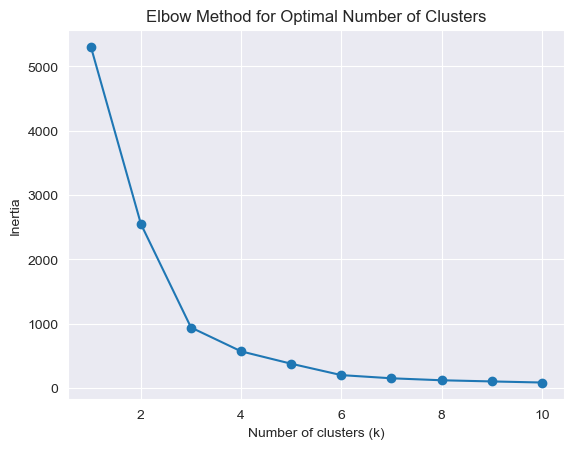

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

# Assuming df is your DataFrame with node attributes and edge attributes added

# Convert the DataFrame to a sparse adjacency matrix
#A_dense = pairwise_distances(df_nodes.drop(columns=['Node']), metric='euclidean')
A_dense = df_nodes_norm[metrics_names]

# Apply Louvain community detection algorithm to detect communities (if needed)
# You may need to find an alternative community detection algorithm for DataFrame-based graphs

# Calculate the modularity for different values of k
k_values = range(1, 11)  # Adjust the range as needed
inertias = []

amount_k = len(k_values)
for k in k_values:
    print(f'{k}/{amount_k}')
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(A_dense)
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


In [13]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(A_dense)
    score = silhouette_score(A_dense, kmeans.labels_)
    silhouette_scores.append(score)

best_k = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2
print("Best number of clusters:", best_k)
silhouette_scores

Best number of clusters: 6


[0.6878964627950266,
 0.8185475942195894,
 0.8424277164280067,
 0.8569116619274946,
 0.8836967171604249,
 0.6585395281034357,
 0.6974474231750787,
 0.7021078708602398,
 0.7040820232579567]

In [14]:
from sklearn.cluster import KMeans

# Assuming df_nodes is your DataFrame containing node attributes

# Extract the features (attributes) from the DataFrame
X = df_nodes_norm[metrics_names]

# Specify the number of clusters (k)
#k = best_k  # Adjust as needed
k = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels as a new column in the DataFrame
df_nodes['Cluster'] = cluster_labels
df_nodes_norm['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
df_nodes


,eigencentrality,name,eccentricity,harmonicclosnesscentrality,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree,betweenesscentrality,Spotify ID,Cluster
0,0.000000,Collage feat. Anthony Monteleone,0.0,0.000000,0,0,0.0,0,0.000000,0.0,0.000000,5QcyHgSqQwlyYrtQYEPw4t,0
1,0.007219,Jpalm,13.0,0.174304,19,0,0.0,6865,0.167204,130.0,0.002218,5Ss1B4541iyrfqV8t4hNMJ,1
2,0.001367,Matty Heilbronn,14.0,0.163995,1,0,0.0,7416,0.158731,2.0,0.000000,08t9cpoVVv9btZOBqZgW3Z,1
3,0.001000,Heiko Laux,2.0,0.583333,2,0,0.0,6708,0.545455,8.0,0.166667,2pmVj0JrzZpPFXhQRrhz1E,2
4,0.000342,Method,1.0,1.000000,1,0,0.0,5976,1.000000,4.0,0.000000,0ZHBxsAXfOsiVwcjpwp1X8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26561,0.027721,8Ball & MJG,11.0,0.222176,5,0,0.0,6865,0.206837,132.0,0.000159,7iUhmKPNkkPPS6FCQxqtNq,1
26562,0.000000,Young Artists,0.0,0.000000,0,0,0.0,7677,0.000000,0.0,0.000000,1bYg7uz1PbD4mKC3f4UnpG,0
26563,0.000000,Ralph Stanley & The Clinch Mountain Boys,0.0,0.000000,0,0,0.0,7678,0.000000,0.0,0.000000,2dUAIFu1VU1tdHZ9V2eFUJ,0
26564,0.000342,Roger Williams,1.0,1.000000,1,0,0.0,7679,1.000000,2.0,0.000000,55CCS64lPz88twUDVquU1u,2


In [15]:
# Assuming df_nodes is your DataFrame with cluster labels

# Calculate the cardinality of each cluster
cluster_cardinality = df_nodes_norm['Cluster'].value_counts()

# Display the cardinality of each cluster
print(cluster_cardinality)


Cluster
1    16318
0     6401
2     3847
Name: count, dtype: int64


In [16]:
df_nodes.to_csv("network_clustered/nodes.csv", index=False)

## Additional Information and Metrics:


In [17]:
##Dimensional reduction:

import pandas as pd
from sklearn.decomposition import PCA

# Assuming df is your DataFrame
# maybe include other normalized features like pop and foll????
columns = metrics_names.copy()    
#columns.append("popularity")


# Omit the first and last columns
X = df_nodes_norm[metrics_names]

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_2d = pca.fit_transform(X)

# Convert the result to a DataFrame
df_2d = pd.DataFrame(X_2d, columns=['Component 1', 'Component 2'])

# Display the resulting DataFrame
df_2d["Spotify ID"] = df_nodes["Spotify ID"]
df_2d["Cluster"] = df_nodes["Cluster"]
df_2d

,Component 1,Component 2,Spotify ID,Cluster
0,0.297280,-0.384879,5QcyHgSqQwlyYrtQYEPw4t,0
1,-0.257948,0.051149,5Ss1B4541iyrfqV8t4hNMJ,1
2,-0.308330,0.063241,08t9cpoVVv9btZOBqZgW3Z,1
3,0.439538,0.174618,2pmVj0JrzZpPFXhQRrhz1E,2
4,0.651203,0.530142,0ZHBxsAXfOsiVwcjpwp1X8,2
...,...,...,...,...
26561,-0.146226,0.041792,7iUhmKPNkkPPS6FCQxqtNq,1
26562,0.297280,-0.384879,1bYg7uz1PbD4mKC3f4UnpG,0
26563,0.297280,-0.384879,2dUAIFu1VU1tdHZ9V2eFUJ,0
26564,0.651207,0.530129,55CCS64lPz88twUDVquU1u,2


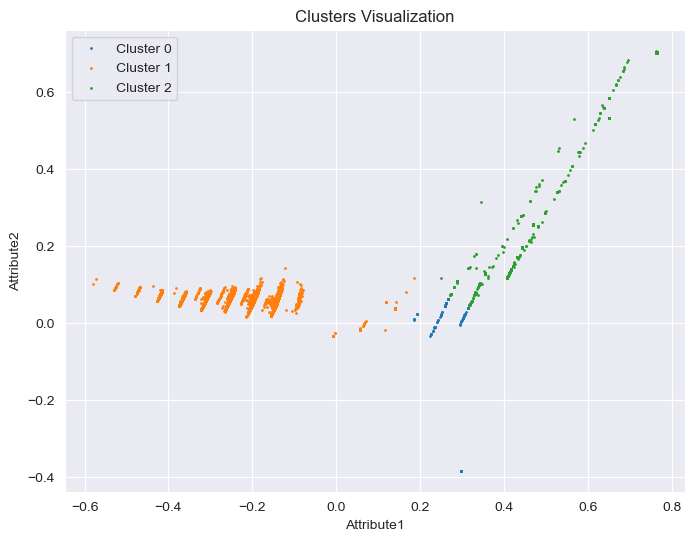

In [18]:
import matplotlib.pyplot as plt

# Assuming df_nodes is your DataFrame with cluster labels

# Plot the clusters in a scatter plot
plt.figure(figsize=(8, 6))

# Iterate over unique cluster labels
for cluster_label in df_2d['Cluster'].unique():
    # Filter the DataFrame for nodes in the current cluster
    df_cluster = df_2d[df_2d['Cluster'] == cluster_label]
    # Plot the nodes in the cluster
    plt.scatter(df_cluster["Component 1"], df_cluster["Component 2"], s=1, label=f'Cluster {cluster_label}')

# Add labels and title
plt.xlabel('Attribute1')
plt.ylabel('Attribute2')
plt.title('Clusters Visualization')

# Add legend
plt.legend()

# Show plot
plt.show()


In [19]:
radar_df = df_nodes_norm.copy()
features = radar_df[metrics_names]
for feature in features:
    radar_df[feature] = (radar_df[feature] >= 0.5).astype(int)

radar_df

,eigencentrality,name,eccentricity,harmonicclosnesscentrality,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree,betweenesscentrality,Spotify ID,Cluster
0,0,Collage feat. Anthony Monteleone,0,0.000000,0,0,0,0,0,0,0,5QcyHgSqQwlyYrtQYEPw4t,0
1,0,Jpalm,1,0.174304,0,0,0,6865,0,0,0,5Ss1B4541iyrfqV8t4hNMJ,1
2,0,Matty Heilbronn,1,0.163995,0,0,0,7416,0,0,0,08t9cpoVVv9btZOBqZgW3Z,1
3,0,Heiko Laux,0,0.583333,0,0,0,6708,1,0,0,2pmVj0JrzZpPFXhQRrhz1E,2
4,0,Method,0,1.000000,0,0,0,5976,1,0,0,0ZHBxsAXfOsiVwcjpwp1X8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26561,0,8Ball & MJG,1,0.222176,0,0,0,6865,0,0,0,7iUhmKPNkkPPS6FCQxqtNq,1
26562,0,Young Artists,0,0.000000,0,0,0,7677,0,0,0,1bYg7uz1PbD4mKC3f4UnpG,0
26563,0,Ralph Stanley & The Clinch Mountain Boys,0,0.000000,0,0,0,7678,0,0,0,2dUAIFu1VU1tdHZ9V2eFUJ,0
26564,0,Roger Williams,0,1.000000,0,0,0,7679,1,0,0,55CCS64lPz88twUDVquU1u,2


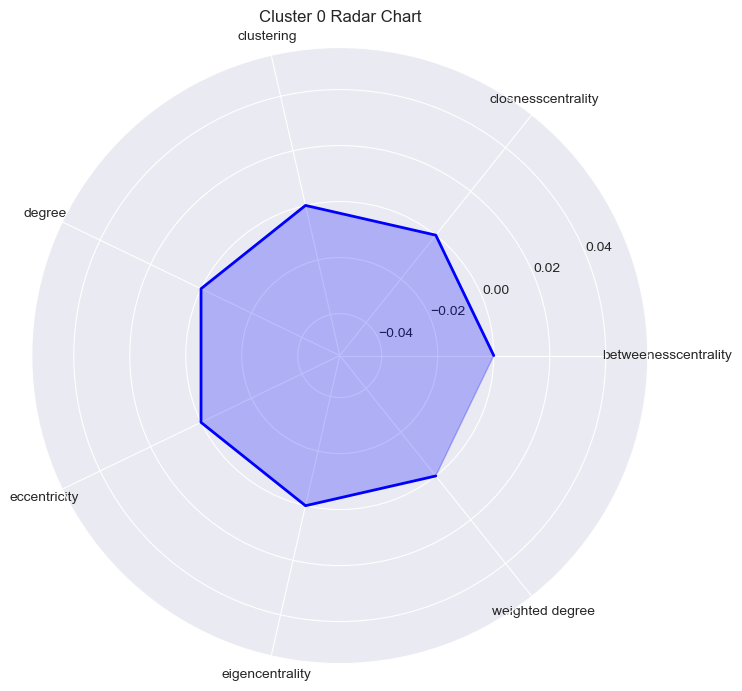

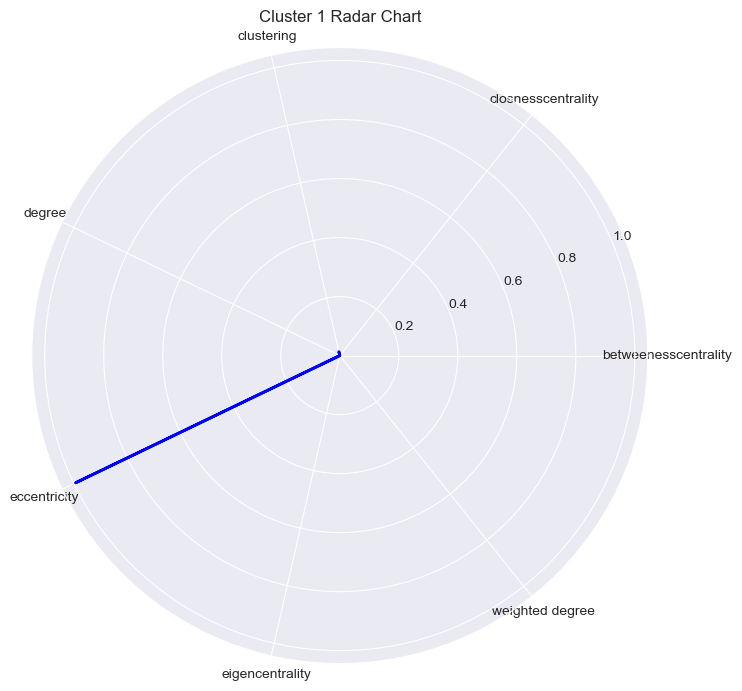

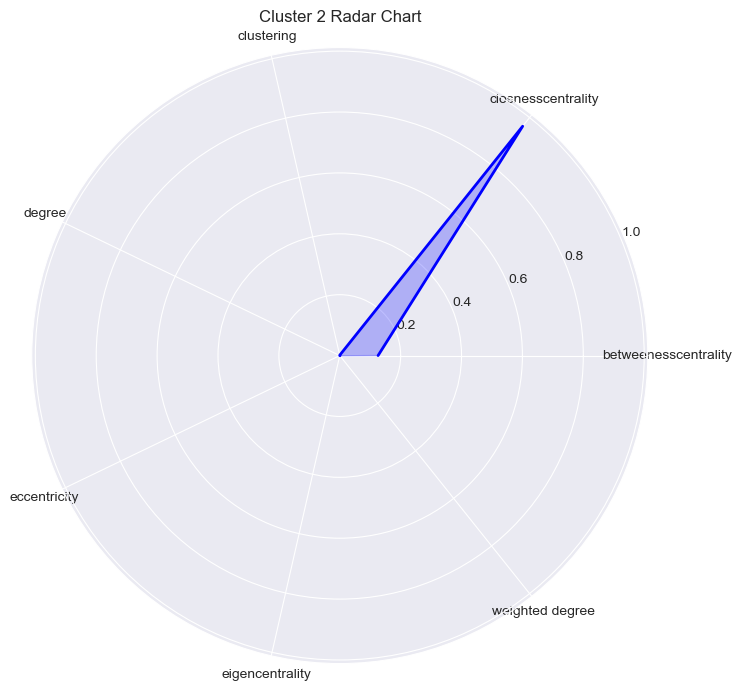

In [20]:
import numpy as np
import matplotlib.pyplot as plt

#for radar charts values to 1 if 0.5 or higher, rest to 0?
#######Profiles?##########

# Define the attributes for the radar chart
attributes = radar_df[metrics_names].columns.tolist()

# Define the theta values (angles) for each attribute
theta = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False)

# Iterate over each unique cluster label
for cluster_label in radar_df['Cluster'].unique():
    # Create a figure and add a subplot with polar projection for each cluster
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Filter the DataFrame for the current cluster
    cluster_data = radar_df[radar_df['Cluster'] == cluster_label]

    # Get attribute values for the current cluster
    values = cluster_data[metrics_names].mean(axis=0).tolist()

    # Repeat the first value to close the plot
    #values += values[:1]

    # Plot the radar chart
    ax.fill(theta, values, color='blue', alpha=0.25)
    ax.plot(theta, values, color='blue', linewidth=2)

    # Set the labels for each attribute
    ax.set_xticks(theta)
    ax.set_xticklabels(attributes)

    # Set the title for the radar chart
    ax.set_title(f'Cluster {cluster_label} Radar Chart')

    # Show plot
    plt.show()


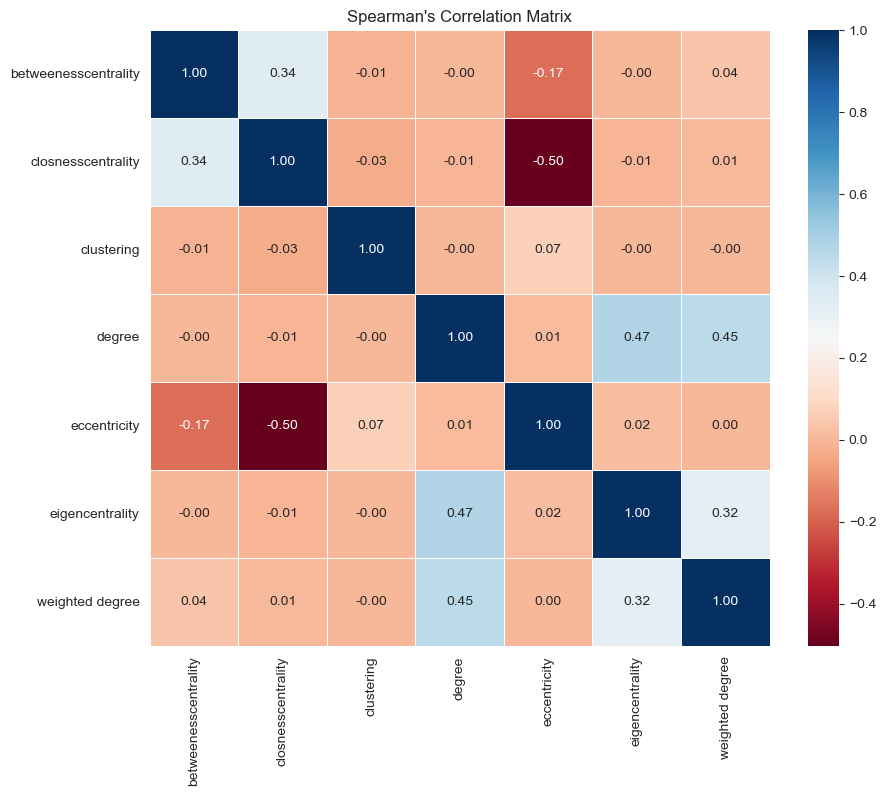

In [21]:
import seaborn as sns

# Compute Spearman's correlation matrix
corr_matrix = radar_df[columns].corr(method='spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title("Spearman's Correlation Matrix")
plt.show()


In [22]:
import pandas as pd


data = {
    "1A 2A 3A 4A":  [0],  "1A 2A 3A 4B": [0], "1A 2A 3B 4A": [0], "1A 2A 3B 4B": [0], "1A 2B 3A 4A": [0], "1A 2B 3A 4B": [0], "1A 2B 3B 4A": [0], "1A 2B 3B 4B": [0], "1B 2A 3A 4A": [1], "1B 2A 3A 4B": [1], "1B 2A 3B 4A": [1], "1B 2A 3B 4B": [1], "1B 2B 3A 4A": [1], "1B 2B 3A 4B": [1], "1B 2B 3B 4A": [1], "1B 2B 3B 4B": [1]
}

df = pd.DataFrame(data)

# New rows to append
new_rows = [
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
]

# Convert new_rows to DataFrame
df_rows = pd.DataFrame(new_rows, columns=df.columns)

# Append the new rows to the existing DataFrame
df = pd.concat([df, df_rows], ignore_index=True)

# df

In [23]:
profile = []

for index, row in radar_df.iterrows():
    match_found = False
    for column_name in df.columns:
        column_data = df[column_name]
        if row["degree"] == column_data.iloc[0] and row["weighted degree"] == column_data.iloc[1] and row["eccentricity"] == column_data.iloc[2] and row["closnesscentrality"] == column_data.iloc[3] and row["clustering"] == column_data.iloc[4] and row["betweenesscentrality"] == column_data.iloc[5] and row["eigencentrality"] == column_data.iloc[6] and not match_found:
            profile.append(column_name)
            match_found = True
        elif column_name == df.columns[-1] and not match_found:
            profile.append("No Match")
            #row["profile"] =  column_name
            
print(len(df.columns))

16


In [24]:
radar_df.insert(radar_df.shape[1], 'profile', profile)

# radar_df

In [25]:
radar_df["profile"].nunique()

3

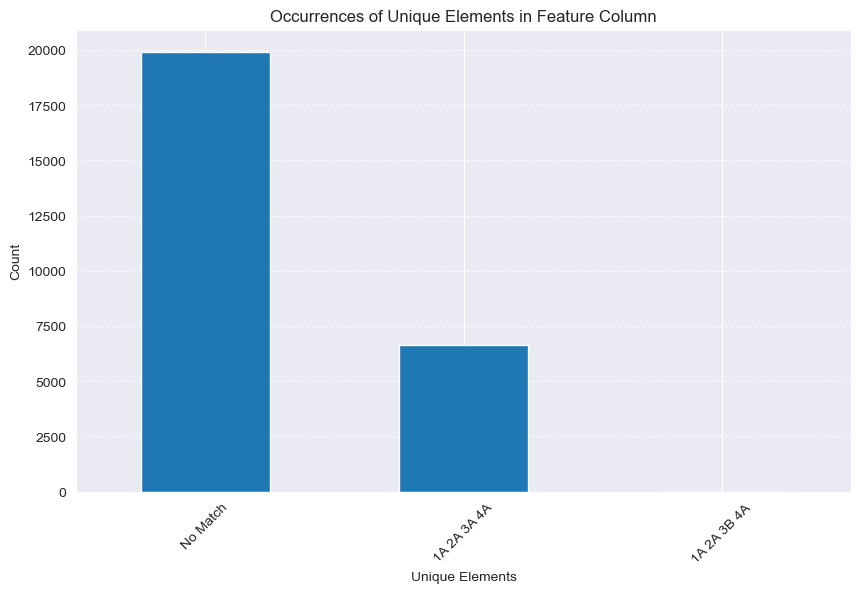

In [26]:
value_counts = radar_df['profile'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Occurrences of Unique Elements in Feature Column')
plt.xlabel('Unique Elements')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


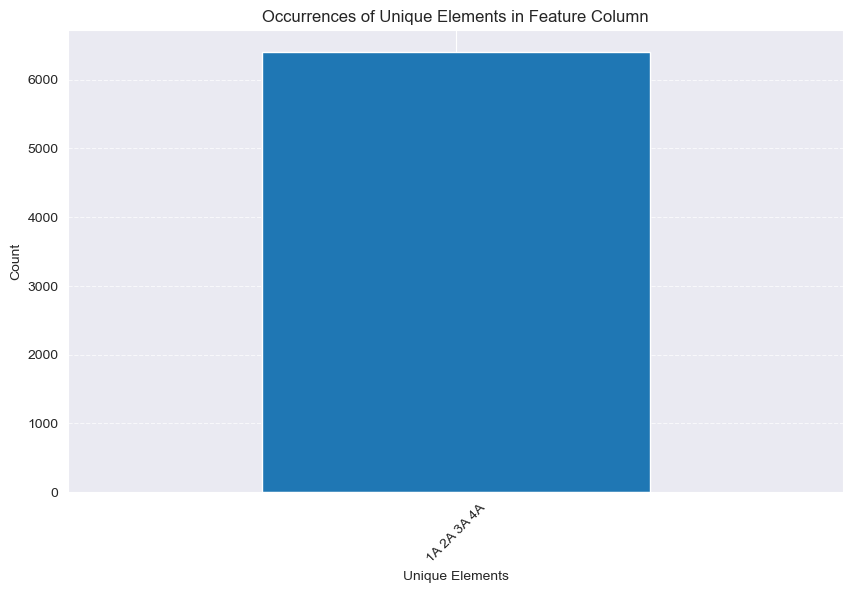

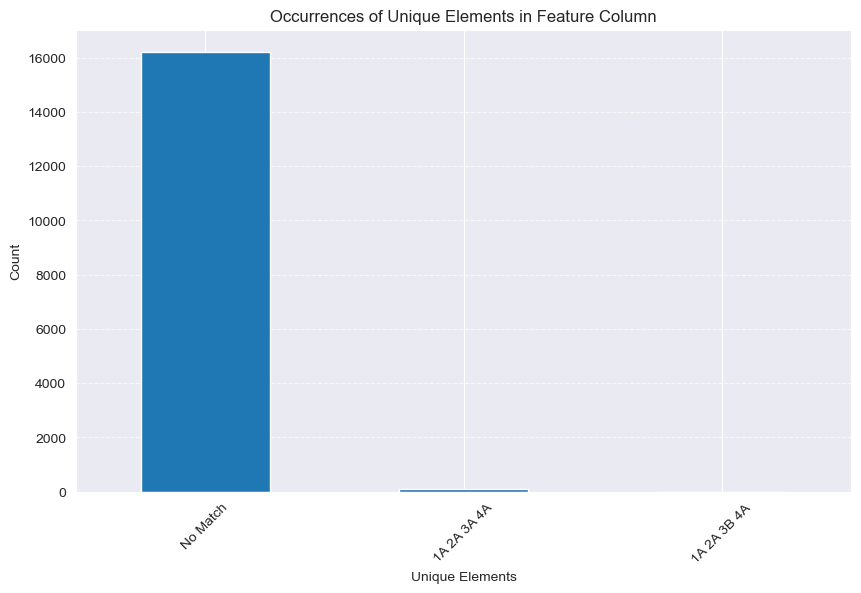

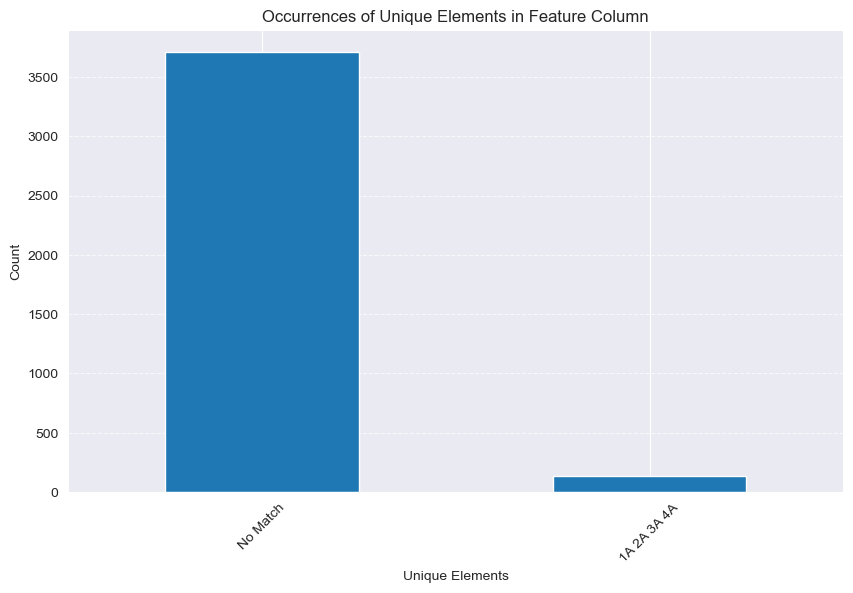

In [27]:
import matplotlib.pyplot as plt

clusters = radar_df["Cluster"].unique()

for i in clusters:
    
    value_counts = radar_df[radar_df["Cluster"] == i]['profile'].value_counts()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title('Occurrences of Unique Elements in Feature Column')
    plt.xlabel('Unique Elements')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [28]:
import pandas as pd

data = [
    ["1A 2A 3A 4A", 0, 0, 0, 0, 0, 0, 0],
    ["1A 2A 3A 4B", 0, 0, 0, 0, 0, 1, 1],
    ["1A 2A 3B 4A", 0, 0, 0, 0, 1, 0, 0],
    ["1A 2A 3B 4B", 0, 0, 0, 0, 1, 1, 1],
    ["1A 2B 3A 4A", 0, 0, 1, 1, 0, 0, 0],
    ["1A 2B 3A 4B", 0, 0, 1, 1, 0, 1, 1],
    ["1A 2B 3B 4A", 0, 0, 1, 1, 1, 0, 0],
    ["1A 2B 3B 4B", 0, 0, 1, 1, 1, 1, 1],
    ["1B 2A 3A 4A", 1, 1, 0, 0, 0, 0, 0],
    ["1B 2A 3A 4B", 1, 1, 0, 0, 0, 1, 1],
    ["1B 2A 3B 4A", 1, 1, 0, 0, 1, 0, 0],
    ["1B 2A 3B 4B", 1, 1, 0, 0, 1, 1, 1],
    ["1B 2B 3A 4A", 1, 1, 1, 1, 0, 0, 0],
    ["1B 2B 3A 4B", 1, 1, 1, 1, 0, 1, 1],
    ["1B 2B 3B 4A", 1, 1, 1, 1, 1, 0, 0],
    ["1B 2B 3B 4B", 1, 1, 1, 1, 1, 1, 1]
]

df = pd.DataFrame(data, columns=["profile", "degree", "weighted degree", "eccentricity", "closnesscentrality", "clustering", "betweenesscentrality", "eigencentrality"])

# df

In [29]:
# radar_df.shape

In [30]:
lol

NameError: name 'lol' is not defined

In [31]:
print("hello")

hello


In [32]:
import math

radar_df.drop(columns=["profile"], inplace=True)
profile = []


common_columns =  ["degree", "weighted degree", "eccentricity", "closnesscentrality", "clustering", "betweenesscentrality", "eigencentrality"]
for index, row in radar_df.iterrows():
    match_found = False
    min_dist = math.inf
    min_index = -1
    for index2, prof in df.iterrows():
        radar_df2 = row[common_columns]
        #print(radar_df2.shape)
        df2 = prof[common_columns]
        
        # Calculate the Hamming distance
        hamming_distance = np.sum(radar_df2 != df2) / (radar_df2.shape[0] * len(radar_df2))
        #print(hamming_distance)
        if hamming_distance < min_dist:
            min_dist = hamming_distance
            min_index = index2
    if min_index != -1:    
        profile.append(df.iloc[min_index])
    else:
        profile.append("No Match")

In [33]:
radar_df.insert(radar_df.shape[1], 'profile', profile)

radar_df

,eigencentrality,name,eccentricity,harmonicclosnesscentrality,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree,betweenesscentrality,Spotify ID,Cluster,profile
0,0,Collage feat. Anthony Monteleone,0,0.000000,0,0,0,0,0,0,0,5QcyHgSqQwlyYrtQYEPw4t,0,profile 1A 2A 3A 4A degree ...
1,0,Jpalm,1,0.174304,0,0,0,6865,0,0,0,5Ss1B4541iyrfqV8t4hNMJ,1,profile 1A 2A 3A 4A degree ...
2,0,Matty Heilbronn,1,0.163995,0,0,0,7416,0,0,0,08t9cpoVVv9btZOBqZgW3Z,1,profile 1A 2A 3A 4A degree ...
3,0,Heiko Laux,0,0.583333,0,0,0,6708,1,0,0,2pmVj0JrzZpPFXhQRrhz1E,2,profile 1A 2A 3A 4A degree ...
4,0,Method,0,1.000000,0,0,0,5976,1,0,0,0ZHBxsAXfOsiVwcjpwp1X8,2,profile 1A 2A 3A 4A degree ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26561,0,8Ball & MJG,1,0.222176,0,0,0,6865,0,0,0,7iUhmKPNkkPPS6FCQxqtNq,1,profile 1A 2A 3A 4A degree ...
26562,0,Young Artists,0,0.000000,0,0,0,7677,0,0,0,1bYg7uz1PbD4mKC3f4UnpG,0,profile 1A 2A 3A 4A degree ...
26563,0,Ralph Stanley & The Clinch Mountain Boys,0,0.000000,0,0,0,7678,0,0,0,2dUAIFu1VU1tdHZ9V2eFUJ,0,profile 1A 2A 3A 4A degree ...
26564,0,Roger Williams,0,1.000000,0,0,0,7679,1,0,0,55CCS64lPz88twUDVquU1u,2,profile 1A 2A 3A 4A degree ...


In [ ]:
profile

In [ ]:
lol
import matplotlib.pyplot as plt

clusters = radar_df["Cluster"].unique()

for i in clusters:

    value_counts = radar_df[radar_df["Cluster"] == i]['profile'].value_counts()

    # Plotting
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title('Occurrences of Unique Elements in Feature Column')
    plt.xlabel('Unique Elements')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
import numpy as np

# Function to calculate Euclidean distance
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

profile = []

common_columns = ["degree", "weighted degree", "eccentricity", "closnesscentrality", "clustering", "betweenesscentrality", "eigencentrality"]

for index, row in df_nodes_norm.iterrows():
    match_found = False
    min_dist = np.inf
    min_index = -1

    for index2, prof in df.iterrows():
        # Extract the common columns for the current rows
        radar_row = row[common_columns]
        df_row = prof[common_columns]

        # Calculate the Euclidean distance
        distance = euclidean_distance(radar_row.values, df_row.values)

        if distance < min_dist:
            min_dist = distance
            min_index = index2

    if min_index != -1:
        profile.append(df.iloc[min_index])
    else:
        profile.append("No Match")

# Insert the 'profile' column into df_nodes_norm
df_nodes_norm.insert(df_nodes_norm.shape[1], 'profile', profile)

df_nodes_norm


In [ ]:
import matplotlib.pyplot as plt

clusters = df_nodes_norm["Cluster"].unique()

for i in clusters:

    value_counts = df_nodes_norm[df_nodes_norm["Cluster"] == i]['profile'].value_counts()

    # Plotting
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title('Occurrences of Unique Elements in Feature Column')
    plt.xlabel('Unique Elements')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
